<a href="https://colab.research.google.com/github/noahbereketab/Senior-Thesis/blob/main/compas_scores_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing necessary classes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


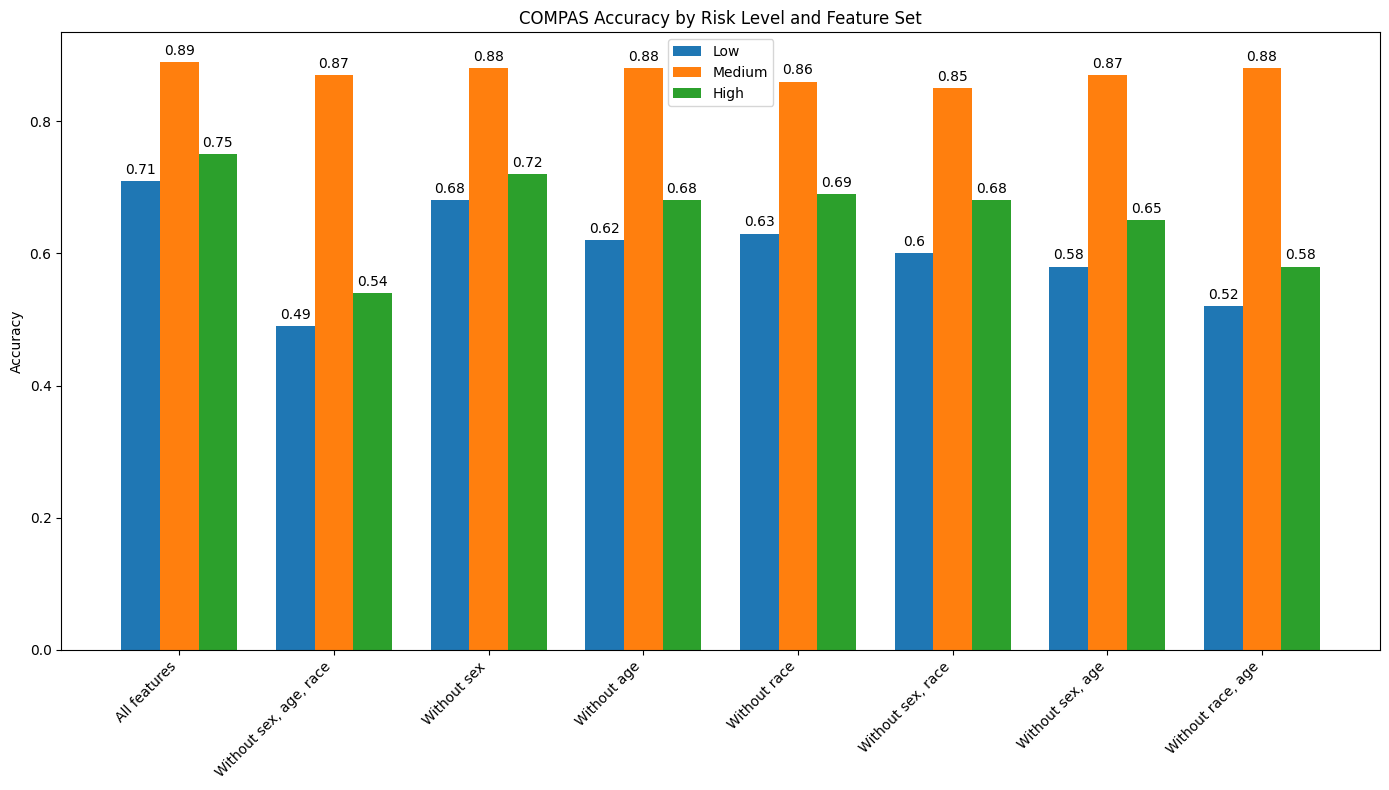

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data
conditions = ['All features', 'Without sex, age, race', 'Without sex', 'Without age', 'Without race', 'Without sex, race', 'Without sex, age', 'Without race, age']
low_accuracy = [0.71, 0.49, 0.68, 0.62, 0.63, 0.60, 0.58, 0.52]
medium_accuracy = [0.89, 0.87, 0.88, 0.88, 0.86, 0.85, 0.87, 0.88]
high_accuracy = [0.75, 0.54, 0.72, 0.68, 0.69, 0.68, 0.65, 0.58]

x = np.arange(len(conditions))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width, low_accuracy, width, label='Low')
rects2 = ax.bar(x, medium_accuracy, width, label='Medium')
rects3 = ax.bar(x + width, high_accuracy, width, label='High')

ax.set_ylabel('Accuracy')
ax.set_title('COMPAS Accuracy by Risk Level and Feature Set')
ax.set_xticks(x)
ax.set_xticklabels(conditions, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


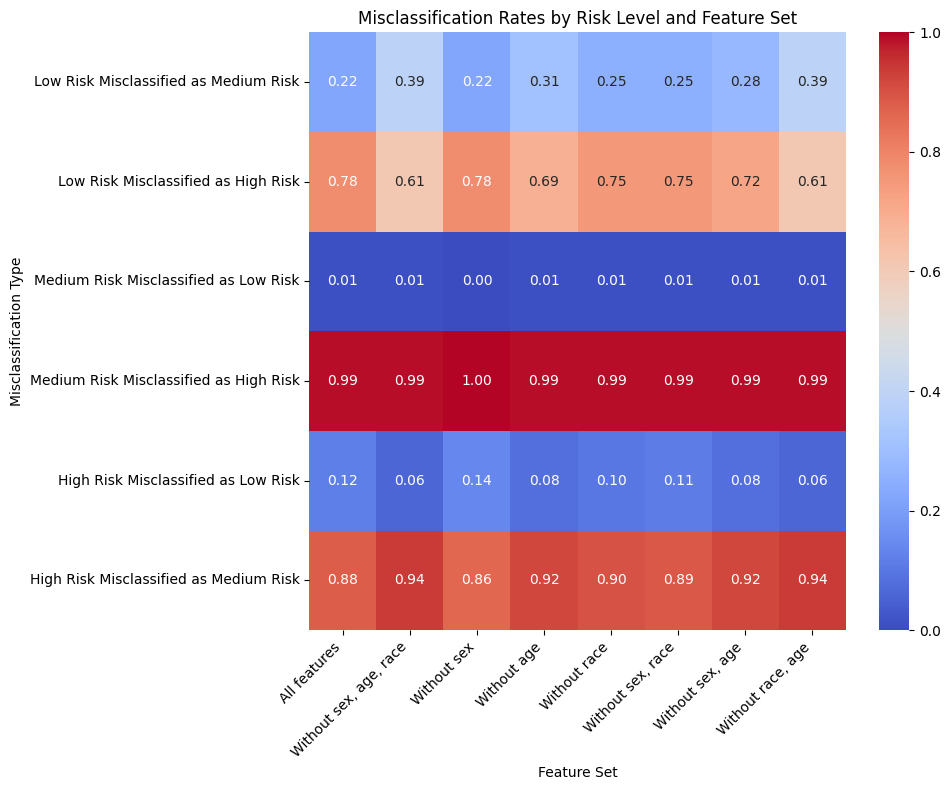

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "All features": [0.22, 0.78, 0.01, 0.99, 0.12, 0.88],
    "Without sex, age, race": [0.39, 0.61, 0.01, 0.99, 0.06, 0.94],
    "Without sex": [0.22, 0.78, 0.00, 1.00, 0.14, 0.86],
    "Without age": [0.31, 0.69, 0.01, 0.99, 0.08, 0.92],
    "Without race": [0.25, 0.75, 0.01, 0.99, 0.10, 0.90],
    "Without sex, race": [0.25, 0.75, 0.01, 0.99, 0.11, 0.89],
    "Without sex, age": [0.28, 0.72, 0.01, 0.99, 0.08, 0.92],
    "Without race, age": [0.39, 0.61, 0.01, 0.99, 0.06, 0.94]
}

# Transforming data into a DataFrame
df = pd.DataFrame(data, index=["Low Risk Misclassified as Medium Risk",
                               "Low Risk Misclassified as High Risk",
                               "Medium Risk Misclassified as Low Risk",
                               "Medium Risk Misclassified as High Risk",
                               "High Risk Misclassified as Low Risk",
                               "High Risk Misclassified as Medium Risk"])

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Misclassification Rates by Risk Level and Feature Set")
plt.ylabel("Misclassification Type")
plt.xlabel("Feature Set")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


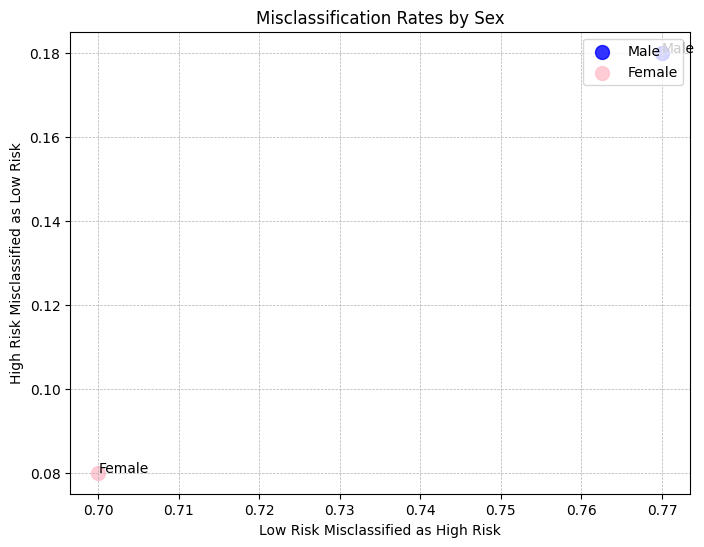

In [26]:
import matplotlib.pyplot as plt

# Data setup
groups = ['Male', 'Female']
misclass_low_as_high = [0.77, 0.70]  # Low Risk Misclassified as High Risk
misclass_high_as_low = [0.18, 0.08]  # High Risk Misclassified as Low Risk

# Scatter plot
colors = ['blue', 'pink']  # Colors for male and female
labels = ['Male', 'Female']

plt.figure(figsize=(8, 6))
for (x, y, color, label) in zip(misclass_low_as_high, misclass_high_as_low, colors, labels):
    plt.scatter(x, y, alpha=0.8, c=color, label=label, s=100)

plt.title('Misclassification Rates by Sex')
plt.xlabel('Low Risk Misclassified as High Risk')
plt.ylabel('High Risk Misclassified as Low Risk')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc="upper right")

# Annotating each point
for i, txt in enumerate(labels):
    plt.annotate(txt, (misclass_low_as_high[i], misclass_high_as_low[i]))

plt.show()


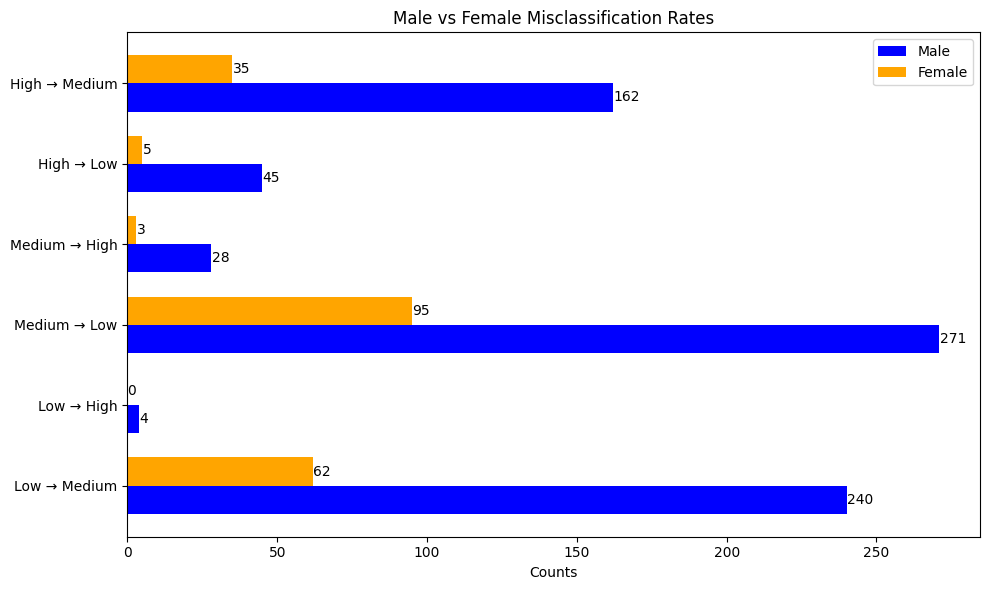

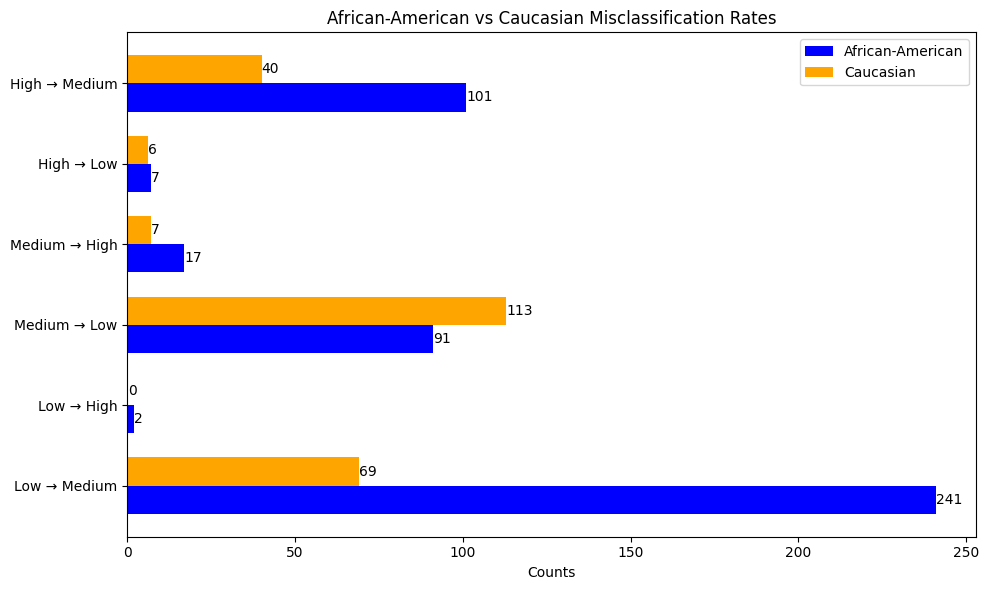

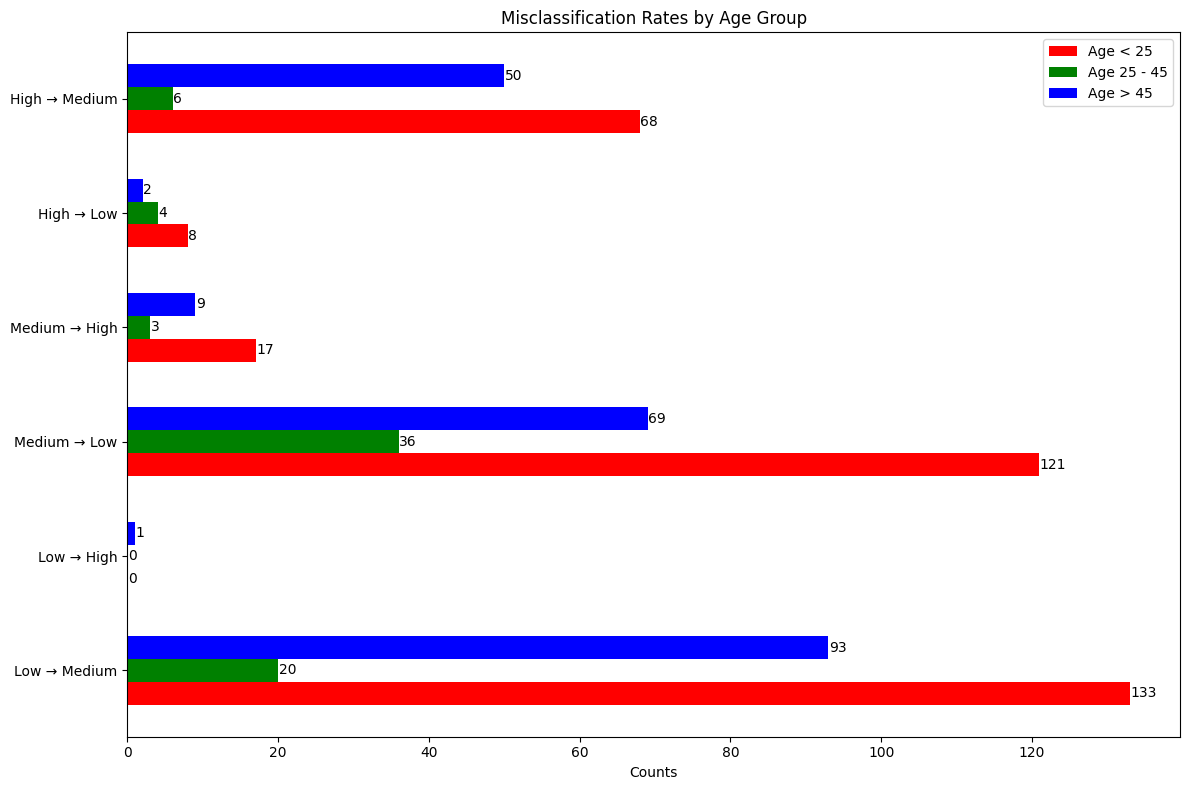

In [32]:
import matplotlib.pyplot as plt
import numpy as np


def plot_group_comparisons(group1, group2, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    index = np.arange(len(misclassification_types))
    bar_width = 0.35

    bars1 = ax.barh(index - bar_width/2, data[group1], bar_width, label=group1, color='blue')
    bars2 = ax.barh(index + bar_width/2, data[group2], bar_width, label=group2, color='orange')

    for bars in [bars1, bars2]:
        for bar in bars:
            width = bar.get_width()
            label_x_pos = bar.get_width() + bar.get_x() + 0.05
            ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center')

    ax.set_xlabel('Counts')
    ax.set_title(title)
    ax.set_yticks(index)
    ax.set_yticklabels(misclassification_types)
    ax.legend()

    plt.tight_layout()
    plt.show()

def plot_age_groups():
    fig, ax = plt.subplots(figsize=(12, 8))
    groups = ['Age < 25', 'Age 25 - 45', 'Age > 45']
    colors = ['red', 'green', 'blue']

    for i, group in enumerate(groups):
        bars = ax.barh(np.arange(len(misclassification_types)) + i*0.2, data[group], 0.2, label=group, color=colors[i])
        for bar in bars:
            width = bar.get_width()
            label_x_pos = bar.get_width() + bar.get_x() + 0.05
            ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center')

    ax.set_xlabel('Counts')
    ax.set_title('Misclassification Rates by Age Group')
    ax.set_yticks(np.arange(len(misclassification_types)) + 0.2)
    ax.set_yticklabels(misclassification_types)
    ax.legend()

    plt.tight_layout()
    plt.show()

plot_group_comparisons('Male', 'Female', 'Male vs Female Misclassification Rates')
plot_group_comparisons('African-American', 'Caucasian', 'African-American vs Caucasian Misclassification Rates')
plot_age_groups()



### Loading and encoding COMPAS data

In [ ]:
data = pd.read_csv("compas-scores.csv")

label_encoder = LabelEncoder()
encoding_dict_race = {
    'African-American': 0,
    'Caucasian': 1,
    'Hispanic': 2,
    'Asian': 3,
    'Other': 4,
}
data['race_encoded'] = data['race'].map(encoding_dict_race)
data.dropna(subset=['race_encoded'], inplace=True)

encoding_dict_sex = {
    'Male': 0,
    'Female': 1,
}
data['sex_encoded'] = data['sex'].map(encoding_dict_sex)
data.dropna(subset=['sex_encoded'], inplace=True)

encoding_dict_age = {
    'Less than 25': 0,
    '25 - 45': 1,
    'Greater than 45': 2,
}
data['age_encoded'] = label_encoder.fit_transform(data['age_cat'])
data.dropna(subset=['age_encoded'], inplace=True)

data['c_charge_degree_encoded'] = label_encoder.fit_transform(data['c_charge_degree'])
data['c_charge_desc_encoded'] = label_encoder.fit_transform(data['c_charge_desc'])

data = data[(data['days_b_screening_arrest'] <= 30) & (data['days_b_screening_arrest'] >= -30)]
data = data[data['decile_score'] != -1]

# Encoding scores to be 1,2,3 for low, medium, high
encoding_dict = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}
data['score_text_encoded'] = data['score_text'].map(encoding_dict)
data.dropna(subset=['score_text_encoded'], inplace=True)


data['v_score_text_encoded'] = data['v_score_text'].map(encoding_dict)
data.dropna(subset=['v_score_text_encoded'], inplace=True)



## suppport methods:

In [ ]:
def prepare_data(data):
    X = data[['sex_encoded', 'age_encoded', 'race_encoded', 'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_sex(data):
    X = data[['age_encoded', 'race_encoded', 'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_age(data):
    X = data[['sex_encoded','race_encoded', 'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_race(data):
    X = data[['sex_encoded', 'age_encoded', 'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_all(data):
    X = data[['priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_sex_race(data):
    X = data[['age_encoded', 'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_sex_age(data):
    X = data[['race_encoded', 'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def prepare_data_without_race_age(data):
    X = data[['sex_encoded',  'priors_count',
              'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
    y = data['decile_score']
    return X, y

def oversample_data(X, y):
    print(f"Before oversampling: {Counter(y)}")
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)
    print(f"After oversampling: {Counter(y_resampled)}")
    return X_resampled, y_resampled

def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train_model(X_train, y_train):
    model = DecisionTreeRegressor(random_state=42)
    #model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model

def make_predictions(model, X):
    predictions = model.predict(X)
    return [round(pred) for pred in predictions]

def encode_and_clean(data, y_train, predictions):

    y_train_encoded = y_train.apply(lambda x: 'Low' if 1 <= x <= 4 else
                                                 'Medium' if 5 <= x <= 7 else
                                                 'High' if 8 <= x <= 10 else None)
    data['y_train_encoded'] = y_train_encoded.astype(str)
    data.dropna(subset=['y_train_encoded'], inplace=True)

    pred_series = pd.Series(predictions)
    pred_encoded = pred_series.apply(lambda x: 'Low' if 1 <= x <= 4 else
                                              'Medium' if 5 <= x <= 7 else
                                              'High' if 8 <= x <= 10 else None)
    data['pred_encoded'] = pred_encoded.astype(str)
    data.dropna(subset=['pred_encoded'], inplace=True)

    # Check for NaNs immediately after encoding
    return y_train_encoded, pred_encoded

def plot_confusion_matrix(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    return conf_mat

def calculate_accuracy(conf_mat):
    accuracies = conf_mat.diagonal() / conf_mat.sum(axis=1)
    accuracy_df = pd.DataFrame({
        'Class': ['Low', 'Medium', 'High'],
        'Accuracy': accuracies
    })
    print(accuracy_df)

def calculate_accuracy_detailed(conf_mat):
    accuracies = {}
    for i, category in enumerate(['Low', 'Medium', 'High']):
        correct_predictions = conf_mat[i, i]
        total_predictions = conf_mat[i].sum()
        accuracy = correct_predictions / total_predictions if total_predictions > 0 else float('nan')
        accuracies[category] = (accuracy, correct_predictions, total_predictions)

    return accuracies

def print_misclassification_details(conf_mat):
    # Calculating misclassified instances for each category
    misclassified_low = conf_mat[0, 1] + conf_mat[0, 2]  # Total 'Low' misclassified
    misclassified_medium = conf_mat[1, 0] + conf_mat[1, 2]  # Total 'Medium' misclassified
    misclassified_high = conf_mat[2, 0] + conf_mat[2, 1]  # Total 'High' misclassified

    # Calculating and printing specific misclassifications for incorrect classifications
    print(f"Incorrect 'Low' misclassified as 'Medium': {conf_mat[0, 1] / misclassified_low:.2f} (Incorrect: {conf_mat[0, 1]}, Total: {misclassified_low})" if misclassified_low else "No incorrect 'Low' misclassifications")
    print(f"Incorrect 'Low' misclassified as 'High': {conf_mat[0, 2] / misclassified_low:.2f} (Incorrect: {conf_mat[0, 2]}, Total: {misclassified_low})" if misclassified_low else "No incorrect 'Low' misclassifications")

    print(f"Incorrect 'Medium' misclassified as 'Low': {conf_mat[1, 0] / misclassified_medium:.2f} (Incorrect: {conf_mat[1, 0]}, Total: {misclassified_medium})" if misclassified_medium else "No incorrect 'Medium' misclassifications")
    print(f"Incorrect 'Medium' misclassified as 'High': {conf_mat[1, 2] / misclassified_medium:.2f} (Incorrect: {conf_mat[1, 2]}, Total: {misclassified_medium})" if misclassified_medium else "No incorrect 'Medium' misclassifications")

    print(f"Incorrect 'High' misclassified as 'Low': {conf_mat[2, 0] / misclassified_high:.2f} (Incorrect: {conf_mat[2, 0]}, Total: {misclassified_high})" if misclassified_high else "No incorrect 'High' misclassifications")
    print(f"Incorrect 'High' misclassified as 'Medium': {conf_mat[2, 1] / misclassified_high:.2f} (Incorrect: {conf_mat[2, 1]}, Total: {misclassified_high})" if misclassified_high else "No incorrect 'High' misclassifications")

def compare_predictions(label, correct_predictions, new_predictions):
    comparison_df = pd.DataFrame({
        f'Correctly Classified as {label}': correct_predictions,
        'New Prediction': new_predictions
    })

    incorrectly_classified = comparison_df[
        (comparison_df[f'Correctly Classified as {label}'] == label) &
        (comparison_df['New Prediction'] != label)
    ]

    counts = incorrectly_classified['New Prediction'].value_counts()
    for other_label in ['Low', 'Medium', 'High']:
        if other_label != label:
            count = counts.get(other_label, 0)
            print(f"Correctly classified as '{label}', now '{other_label}': {count}")

    return comparison_df

## Decision tree regressor predicting compas general recidivism:



In [ ]:
data = data.loc[data['sex_encoded'] != 0]
data = data.loc[(data['race_encoded'] != 3) & (data['race_encoded'] != 4) & (data['race_encoded'] != 0) & (data['race_encoded'] != 2)]
#data = data.loc[(data['age_encoded'] != 0) & (data['age_encoded'] != 1)]

X, y = prepare_data(data)
X_train, X_test, y_train, y_test =split_data(X, y)

X_no_protected, y_no_protected = prepare_data_without_all(data)
X_train_no_protected, X_test_no_protected, y_train_no_protected, y_test_no_protected = split_data(X_no_protected, y_no_protected)

# Ensure training sets have the same number of instances
assert X_train.shape[0] == X_train_no_protected.shape[0], "The number of instances in training sets must be the same."

#X_resampled, y_resampled = oversample_data(X, y)

#X_train, X_test, y_train, y_test =split_data(X_resampled, y_resampled)

decision_tree_model = train_model(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_train)
decision_tree_pred_rounded = [round(pred) for pred in decision_tree_pred]

# Predictions with new model
new_model = train_model(X_train_no_protected, y_train_no_protected)
new_predictions_raw = new_model.predict(X_train_no_protected)
new_predictions_rounded = [round(pred) for pred in new_predictions_raw]

y_train_encoded, pred_encoded = encode_and_clean(data, y_train, decision_tree_pred_rounded)
_, new_encoded_predictions = encode_and_clean(data, y_train_no_protected, new_predictions_rounded)

# Ensure prediction arrays have the same length
assert len(pred_encoded) == len(new_encoded_predictions), "The length of the original and new predictions must be the same."


conf_mat = confusion_matrix(y_train_encoded, pred_encoded)

plot_confusion_matrix(y_train_encoded, pred_encoded)

calculate_accuracy(conf_mat)

for category, (accuracy, correct, total) in calculate_accuracy_detailed(conf_mat).items():
    if pd.isna(accuracy):
        print(f"{category}: No data available")
    else:
        print(f"{category}: {accuracy:.2f} (Correct: {correct}, Total: {total})")
print();
print_misclassification_details(conf_mat)
print();

# Reset the index of pred_encoded to align it with correct_label
pred_encoded_reset = pred_encoded.reset_index(drop=True)
new_encoded_predictions_reset = new_encoded_predictions.reset_index(drop=True)

# Ensure prediction arrays have the same length
assert len(pred_encoded_reset) == len(new_encoded_predictions_reset), "The length of the original and new predictions must be the same."

# Comparing each category
for label in ['Low', 'Medium', 'High']:
    correct_label = (y_train_encoded.reset_index(drop=True) == label)
    correct_predictions = pred_encoded_reset[correct_label]
    new_predictions = new_encoded_predictions_reset[correct_label]

    print(f"\nComparing cases correctly classified as '{label}':")
    comparison_df = compare_predictions(label, correct_predictions, new_predictions)



ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.


## Logicstic regressor predicting compas general recidivism:



Counter({1: 11, 5: 5, 4: 5, 3: 4, 6: 4, 7: 2, 2: 2, 9: 1})
34


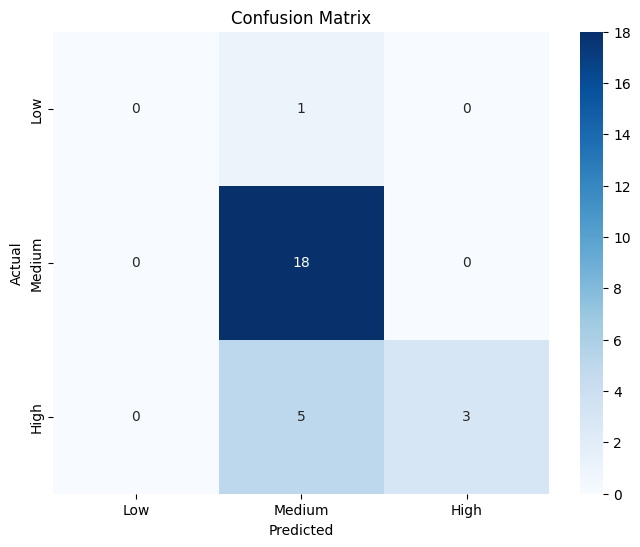

    Class  Accuracy
0     Low     0.000
1  Medium     1.000
2    High     0.375


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X, y = prepare_data_without_all(data)
print(Counter(y))
#X_resampled, y_resampled = oversample_data(X, y)

print(len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=100000)

logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_train)
#logistic_pred = logistic_model.predict(X_test)

y_train_encoded, pred_encoded = encode_and_clean(data, y_train, logistic_pred)

conf_mat = confusion_matrix(y_train_encoded, pred_encoded)
#conf_mat = confusion_matrix(y_test, logistic_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Calculate Accuracy for Each Class
accuracies = conf_mat.diagonal() / conf_mat.sum(axis=1)

# Create a DataFrame to Display the Accuracies
accuracies = conf_mat.diagonal() / conf_mat.sum(axis=1)
accuracy_df = pd.DataFrame({
    'Class': ['Low', 'Medium', 'High'],
    'Accuracy': accuracies
})
print(accuracy_df)




## Decision tree regressor predicting compas violent recidivism:



Decision Tree:
Mean Squared Error: 0.0
R-squared (R2): nan



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


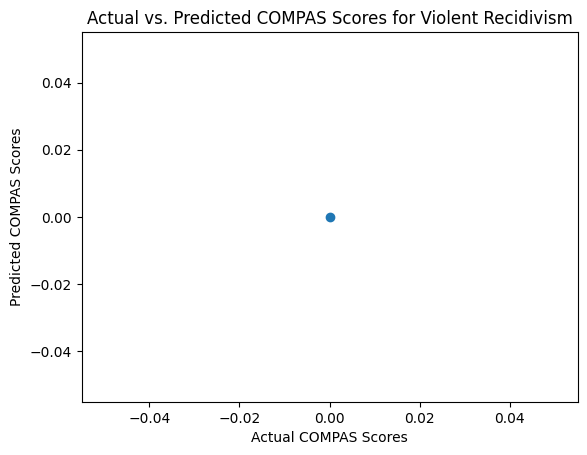

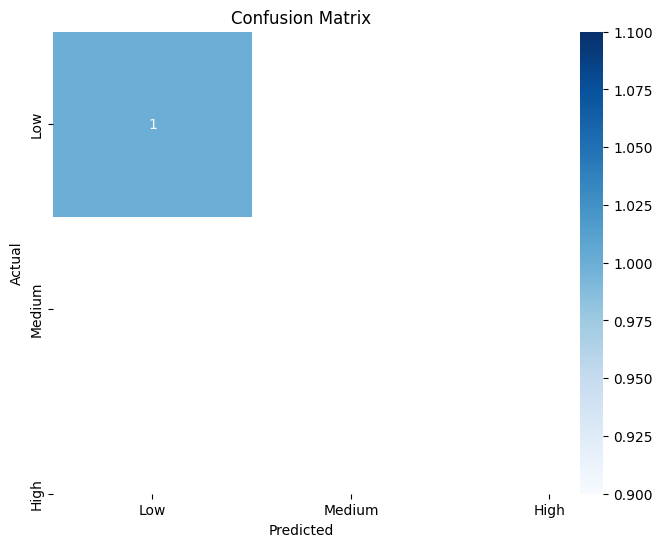

ValueError: All arrays must be of the same length

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# X = data[[ 'priors_count','c_charge_desc_encoded', 'age_encoded']]

X = data[['sex_encoded', 'age_encoded', 'race_encoded', 'priors_count',
         'c_charge_degree_encoded', 'c_charge_desc_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]

y = data['v_score_text_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_test)

decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)
print("Decision Tree:")
print(f"Mean Squared Error: {decision_tree_mse}")
print(f"R-squared (R2): {decision_tree_r2}")
print()

plt.scatter(y_test, decision_tree_pred)
plt.xlabel("Actual COMPAS Scores")
plt.ylabel("Predicted COMPAS Scores")
plt.title("Actual vs. Predicted COMPAS Scores for Violent Recidivism")
plt.show()

decision_tree_pred_rounded = [round(pred) for pred in decision_tree_pred]

conf_mat = confusion_matrix(y_test, decision_tree_pred_rounded)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Calculate Accuracy for Each Class
accuracies = conf_mat.diagonal() / conf_mat.sum(axis=1)
accuracy_df = pd.DataFrame({
    'Class': ['Low', 'Medium', 'High'],
    'Accuracy': accuracies
})
print(accuracy_df)



## Logicstic regressor predicting compas violent recidivism:



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classifier:
Mean Squared Error: 0.43769968051118213
R-squared (R2): -0.03607534405170587


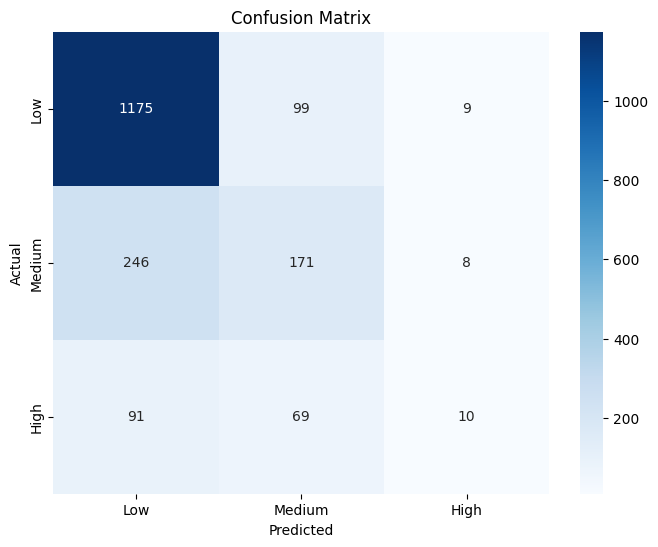

    Class  Accuracy
0     Low  0.915822
1  Medium  0.402353
2    High  0.058824


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the test data
logistic_pred = logistic_model.predict(X_test)

# Calculate mean squared error and r-squared
logistic_mse = mean_squared_error(y_test, logistic_pred)
logistic_r2 = r2_score(y_test, logistic_pred)

print("Logistic Regression Classifier:")
print(f"Mean Squared Error: {logistic_mse}")
print(f"R-squared (R2): {logistic_r2}")


conf_mat = confusion_matrix(y_test, logistic_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracies = conf_mat.diagonal() / conf_mat.sum(axis=1)

accuracy_df = pd.DataFrame({
    'Class': ['Low', 'Medium', 'High'],
    'Accuracy': accuracies
})

print(accuracy_df)

## Computing correlation between different features and COMPAS scores:




In [ ]:
correlation_matrix = data[['sex_encoded', 'age_encoded', 'race_encoded', 'priors_count',
                           'c_charge_degree_encoded', 'score_text_encoded',
                           'c_charge_desc_encoded', 'v_score_text_encoded']].corr()

# print(correlation_matrix)

compas_correlations_general = correlation_matrix['score_text_encoded']

print("\nCorrelation with general COMPAS score:")
print(compas_correlations_general)

compas_correlations_violent = correlation_matrix['v_score_text_encoded']

print("\nCorrelation with violent COMPAS score:")
print(compas_correlations_violent)


Correlation with general COMPAS score:
sex_encoded                0.058585
age_encoded                0.092573
race_encoded              -0.278827
priors_count               0.429897
c_charge_degree_encoded   -0.191853
score_text_encoded         1.000000
c_charge_desc_encoded      0.150643
v_score_text_encoded       0.644497
Name: score_text_encoded, dtype: float64

Correlation with violent COMPAS score:
sex_encoded                0.117293
age_encoded                0.339416
race_encoded              -0.213503
priors_count               0.198649
c_charge_degree_encoded   -0.150436
score_text_encoded         0.644497
c_charge_desc_encoded      0.074187
v_score_text_encoded       1.000000
Name: v_score_text_encoded, dtype: float64
